In [ ]:
#Importing the required libraries

#Importing the required libraries

import numpy as np 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
%load_ext memory_profiler
import time


In [ ]:
#Load the Fashion-MNIST dataset
fashion_mnist=keras.datasets.fashion_mnist

In [ ]:
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data() #split the data into train and test

In [ ]:
X_train_full.shape,y_train_full.shape

In [ ]:
X_test.shape,y_test.shape

In [20]:
nsamples,nx,ny=X_train_full.shape
X_train_2d=np.reshape(X_train_full,(nsamples,nx*ny)) #reshape the 2D array into a 1D array
nsamples,nx,ny=X_test.shape
X_new_test=np.reshape(X_test,(nsamples,nx*ny)) #reshape the 2D array into a 1D array


In [ ]:
len(X_train_2d)

In [ ]:
#further split the data and scale the pixel intensity to 0-1 range

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [ ]:
#Plot the first 20 images of the training data

import matplotlib.pyplot as plt
plt.figure(figsize=(50, 50))

for i in range(20):
  plt.subplot(100 // 25, 25, i + 1)
  plt.imshow(X_train[i], cmap="binary")
  plt.title("Label {}".format(y_train[i]))
  plt.axis('off')
plt.show()

In [23]:

nsamples, nx, ny = X_train.shape
X_train_2d=[]
for i in range(nsamples):
    X_train_2d.append(X_train[i].reshape(nx*ny))

In [ ]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
%load_ext memory_profiler
import time


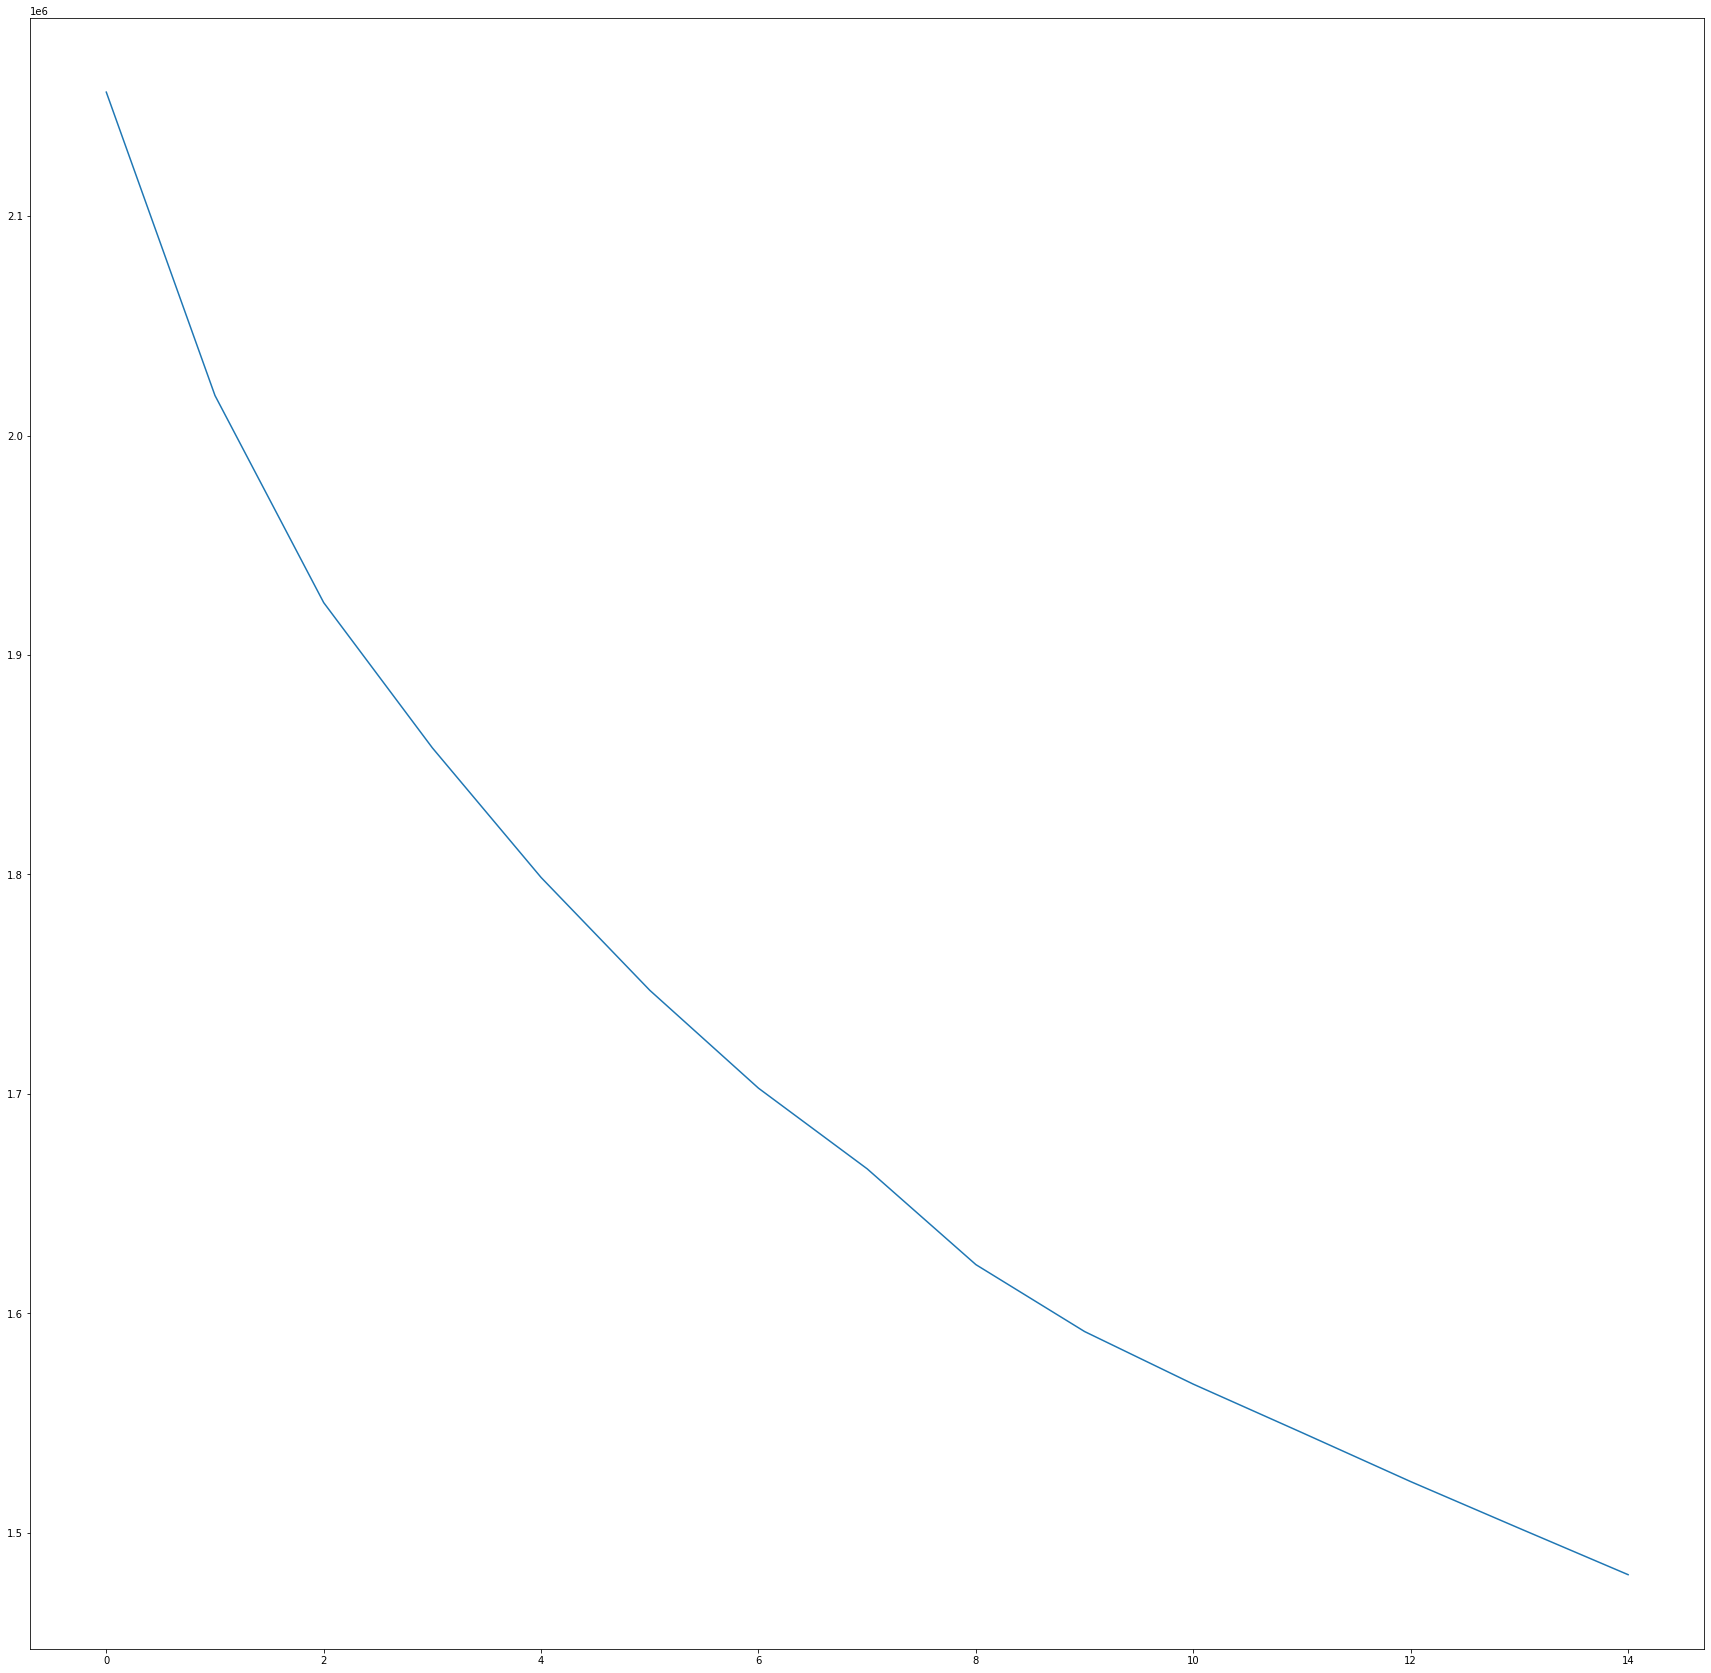

Time= 588.29
peak memory: 1486.32 MiB, increment: 663.84 MiB


In [20]:
%%memit

t1=time.perf_counter()
inertia=[] #to store the value of inertia for different number of clusters

plt.figure(figsize=(30, 30))
for k in range(5,20):
  kmeans = KMeans(n_clusters=k,random_state=32) 
  y_pred = kmeans.fit_predict(X_train_2d) #fitting the model
  inertia.append(kmeans.inertia_) #calculating the inertia
t2=time.perf_counter()
plt.plot(inertia) #plotting inertia against k
plt.show()
print("Time=",np.round((t2-t1),2))

# We can see an elbow at 8, but we know that the optimal number of clusters should be 10.

<function matplotlib.pyplot.show(close=None, block=None)>

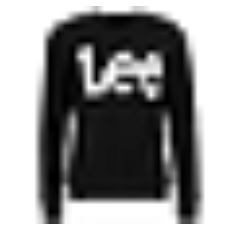

In [21]:
#plt.subplot(100 // 25, 25, index + 1)
plt.imshow(X_new_test[1].reshape(28, 28), cmap="binary", interpolation="bilinear") #plot an image from the test dataset
plt.axis('off')
plt.show

In [ ]:
%%memit

#Applying Logistic Regression to label the entire dataset
t1=time.perf_counter()
log_reg = LogisticRegression(multi_class="ovr", solver="saga", max_iter=5000, random_state=42) #train the model
log_reg.fit(X_train_2d, y_train) #fitting the model
y_pred=log_reg.predict(X_new_test) #predicting the values on the test set
t2=time.perf_counter()

print("Logistic Regression with 10 clusters took: ", (t2-t1),"seconds")

print(log_reg.score(X_new_test, y_test)) #accuracy of the prediction


# Using Neural Networks on the data without Clustering

In [22]:
#Defining the layers of our neural network

model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [23]:
#Assign the metrics to our model

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [24]:
%%memit
t1=time.perf_counter()
#fitting the model
history=model.fit(np.array(X_train_2d),y_train,epochs=30)

t2=time.perf_counter()

print("Neural Network on data without clustering took: ",(t2-t1),"seconds")

Epoch 1/30
1719/1719 [==============================] - 24s 4ms/step - loss: 0.7088 - accuracy: 0.7670
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4841 - accuracy: 0.8312
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4401 - accuracy: 0.8457
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4135 - accuracy: 0.8543
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3922 - accuracy: 0.8624
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3766 - accuracy: 0.8674
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3635 - accuracy: 0.8718
Epoch 8/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3522 - accuracy: 0.8753
Epoch 9/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3411 - accuracy: 0.8796
Epoch 10/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.33

In [25]:
X_new_test=np.array(X_new_test)
y_test=np.array(y_test)
model.evaluate(X_new_test,y_test)  #Evaluating the accuracy of the model on the test dataset

313/313 [==============================] - 12s 3ms/step - loss: 0.3327 - accuracy: 0.8825


[0.33273276686668396, 0.8824999928474426]

# Fitting the model when number of clusters=10

In [11]:
%%memit

k=10 #number of clusters

t1=time.perf_counter()
kmeans = KMeans(n_clusters=k,random_state=32)
X_digits_dist = kmeans.fit_transform(X_train_2d) #fitting the model
t2=time.perf_counter()

representative_digit_idx = np.argmin(X_digits_dist, axis=0) #images which are closest to a fixed point
X_train_2d=np.array(X_train_2d)
X_representative_digits = X_train_2d[representative_digit_idx] #images closest to the centroid
print("Kmeans with k =10 took: ",(np.round((t2-t1)/60),2),"seconds")

Kmeans with k =10 took:  (0.0, 2) seconds
peak memory: 1417.90 MiB, increment: 615.23 MiB


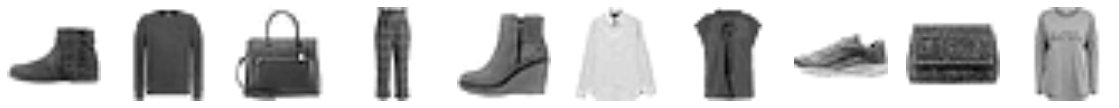

In [12]:
#plot the images closest to the centroid

plt.figure(figsize=(50, 50))
for index, X_representative_image in enumerate(X_representative_digits):
    plt.subplot(100 // 25, 25, index + 1)
    plt.imshow(X_representative_image.reshape(28, 28), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

In [13]:
y_representative_digits=[9,2,8,1,9,6,0,7,8,3] #hand labelled the images obtained above
y_representative_digits

[9, 2, 8, 1, 9, 6, 0, 7, 8, 3]

# I have tried to get the labels of the argmin points but it isn't working.

centroid_labels=[]
for i in representative_digit_idx:
    centroid_labels.append(kmeans.labels_[i])
    
centroid_labels

In [14]:
#perform label propagation

y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [30]:
%%memit

#Applying Logistic Regression to label the entire dataset
t1=time.perf_counter()
log_reg = LogisticRegression(multi_class="ovr", solver="saga", max_iter=5000, random_state=42) #train the model
log_reg.fit(X_train_2d, y_train_propagated) #fitting the model
y_pred=log_reg.predict(X_new_test) #predicting the values on the test set
t2=time.perf_counter()

print("Logistic Regression with 10 clusters took: ", (t2-t1),"seconds")

print(log_reg.score(X_new_test, y_test)) #accuracy of the prediction


Logistic Regression with 10 clusters took:  3111.8930591000003 seconds
peak memory: 1275.73 MiB, increment: 0.12 MiB


In [22]:
X_train_2d.shape,y_train_propagated.shape

((60000, 784), (55000,))

# Implementing Neural Networks on Clustered data with k=10

In [28]:
%%memit

#fit the clustered values to the previously defined neural network

t1=time.perf_counter()
history=model.fit(np.array(X_train_2d),y_train_propagated,epochs=30) 
t2=time.perf_counter()

print("Neural Network with 10 clusters took: ",(t2-t1),"seconds")

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0090 - accuracy: 0.9980
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0117 - accuracy: 0.9973
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0082 - accuracy: 0.9981
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0085 - accuracy: 0.9983
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0091 - accuracy: 0.9975
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0082 - accuracy: 0.9981
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0089 - accuracy: 0.9979
Epoch 8/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0100 - accuracy: 0.9972
Epoch 9/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0089 - accuracy: 0.9979
Epoch 10/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.008

In [25]:
X_new_test=np.array(X_new_test)
y_test=np.array(y_test)
model.evaluate(X_new_test,y_test)  #evaluating the accuracy on the test set

313/313 [==============================] - 1s 2ms/step - loss: 18.3872 - accuracy: 0.4780


[18.38717269897461, 0.4779999852180481]

# Fitting the model when number of clusters=8

In [33]:
%%memit

k=8 #number of clusters


t1=time.perf_counter()
kmeans = KMeans(n_clusters=k,random_state=32)
X_digits_dist = kmeans.fit_transform(X_train_2d) #fitting the model
t2=time.perf_counter() 

representative_digit_idx = np.argmin(X_digits_dist, axis=0) #images which are closest to a fixed point
X_train_2d=np.array(X_train_2d)
X_representative_digits = X_train_2d[representative_digit_idx]  #images closest to the centroid
print("Time taken for fitting KMeans when k =8:",(np.round((t2-t1)/60),2),"seconds")

Time taken for fitting KMeans when k =8: (0.0, 2) seconds
peak memory: 1698.96 MiB, increment: 658.16 MiB


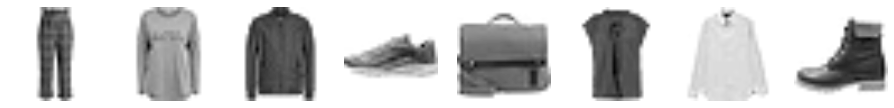

In [34]:
#plot the images closest to the centroid

plt.figure(figsize=(50, 50))
for index, X_representative_image in enumerate(X_representative_digits):
    plt.subplot(100 // 25, 25, index + 1)
    plt.imshow(X_representative_image.reshape(28, 28), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

In [35]:
y_representative_digits=[1,0,2,7,8,0,6,9] #hand labelled the images obtained above
y_representative_digits

[1, 0, 2, 7, 8, 0, 6, 9]

In [36]:
#perform label propagation
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [42]:
%%memit

#Applying Logistic Regression to label the entire dataset

t1=time.perf_counter()
log_reg = LogisticRegression(multi_class="ovr", solver="saga", max_iter=5000, random_state=42)
log_reg.fit(X_train_2d, y_train_propagated) #fitting the model
y_pred=log_reg.predict(X_new_test) #predicting the model
t2=time.perf_counter()
print("Logistic Regression with 8 clusters took: ", (t2-t1),"seconds")

print(log_reg.score(X_new_test, y_test))   #accuracy of the prediction


Logistic Regression with 8 clusters took:  3512.4477802 seconds
0.4787
peak memory: 674.62 MiB, increment: 0.11 MiB


# Implementing Neural Networks on Clustered data with k=8

In [16]:
#Defining the layers of our neural network

model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])#two hidden layers consisting of 

In [17]:
#Assign the metrics to our model

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [27]:
%%memit
#fit the clustered values to the previously defined neural network

t1=time.perf_counter()
history=model.fit(np.array(X_train_2d),y_train_propagated,epochs=30)
t2=time.perf_counter()

print("Neural Network with 8 clusters took: ",(t2-t1),"seconds")

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0174 - accuracy: 0.9953
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0166 - accuracy: 0.9951
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0163 - accuracy: 0.9953
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0155 - accuracy: 0.9954
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0177 - accuracy: 0.9947
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0162 - accuracy: 0.9955
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0161 - accuracy: 0.9954
Epoch 8/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0146 - accuracy: 0.9962
Epoch 9/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0147 - accuracy: 0.9958
Epoch 10/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.014

In [39]:
X_new_test=np.array(X_new_test)
y_test=np.array(y_test)
model.evaluate(X_new_test,y_test)  #evaluating the accuracy on the test set

313/313 [==============================] - 1s 3ms/step - loss: 23.2663 - accuracy: 0.4718


[23.266305923461914, 0.4717999994754791]